## Загрузка данных

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = (20, 10)
plt.rcParams['figure.facecolor'] = 'white'

In [2]:
all_data = pd.read_csv('dataset_group.csv', header=None)
# В файле нет строки с названием столбцов, поэтому параметр header равен None.
# Интерес представляет информация об id покупателя - столбец с названием 1
# Название купленного товара хранится в столбце с названием 2

In [3]:
unique_id = list(set(all_data[1]))
print(f'Buyers: {len(unique_id)}') # Выведем количество id

Buyers: 1139


In [4]:
items = list(set(all_data[2]))
print(f'Items: {len(items)}') # Выведем количество товаров

Items: 38


In [5]:
dataset = [[elem for elem in all_data[all_data[1] == id][2] if elem in
items] for id in unique_id]

## Подготовка данных

In [6]:
from mlxtend.preprocessing import TransactionEncoder
te = TransactionEncoder()
te_ary = te.fit(dataset).transform(dataset)
df = pd.DataFrame(te_ary, columns=te.columns_)

In [7]:
df

,all- purpose,aluminum foil,bagels,beef,butter,cereals,cheeses,coffee/tea,dinner rolls,dishwashing liquid/detergent,...,shampoo,soap,soda,spaghetti sauce,sugar,toilet paper,tortillas,vegetables,waffles,yogurt
0,True,True,False,True,True,False,False,False,True,False,...,True,True,True,False,False,False,False,True,False,True
1,False,True,False,False,False,True,True,False,False,True,...,True,False,False,False,False,True,True,True,True,True
2,False,False,True,False,False,True,True,False,True,False,...,True,True,True,True,False,True,False,True,False,False
3,True,False,False,False,False,True,False,False,False,False,...,False,False,True,False,False,True,False,False,False,False
4,True,False,False,False,False,False,False,False,True,False,...,False,False,True,True,False,True,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1134,True,False,False,True,False,True,True,True,True,True,...,True,True,False,False,True,False,False,False,False,False
1135,False,False,False,False,False,True,True,True,True,True,...,False,True,False,True,False,False,False,True,False,False
1136,False,False,True,True,False,False,False,False,True,True,...,True,True,False,False,True,False,True,True,False,True
1137,True,False,False,True,False,False,True,False,False,False,...,False,True,True,True,True,True,False,True,True,True


Исходные данные были представлены в виде таблицы с колонками: дата, id покупателя и наименование покупки.
Теперь данные представлены так, что для каждого покупателя (наименование ряда) существуют колонки, каждая
из которых представляет собой один из продуктов, а значения для каждого покупателя - купил он этот продукт
или нет. Проще говоря получилась "тепловая карта" продуктов для покупателей.

## Ассоциативный анализ с использованием алгоритма Apriori

In [8]:
from mlxtend.frequent_patterns import apriori

results = apriori(df, min_support=0.3, use_colnames=True)
results['length'] = results['itemsets'].apply(lambda x: len(x)) # Добавление размера набора
results

,support,itemsets,length
0,0.374890,(all- purpose),1
1,0.384548,(aluminum foil),1
2,0.385426,(bagels),1
3,0.374890,(beef),1
4,0.367867,(butter),1
5,0.395961,(cereals),1
6,0.390694,(cheeses),1
7,0.379280,(coffee/tea),1
8,0.388938,(dinner rolls),1
9,0.388060,(dishwashing liquid/detergent),1


С помощью алгоритма apriori мы выделили часто встречающиеся сочетания (наборы) продуктов, которые покупают люди
(в данном датасете), в том числе наборы из одного продукта. Частоту, которая считается "частой", мы задали параметром
min_support. Частота = количество строк с всеми True для набора / общее количество строк.

In [9]:
results = apriori(df, min_support=0.3, use_colnames=True, max_len=1)
results

,support,itemsets
0,0.374890,(all- purpose)
1,0.384548,(aluminum foil)
2,0.385426,(bagels)
3,0.374890,(beef)
4,0.367867,(butter)
5,0.395961,(cereals)
6,0.390694,(cheeses)
7,0.379280,(coffee/tea)
8,0.388938,(dinner rolls)
9,0.388060,(dishwashing liquid/detergent)


In [10]:
results = apriori(df, min_support=0.3, use_colnames=True)
results['length'] = results['itemsets'].apply(lambda x: len(x))
results = results[results['length'] == 2]
results

,support,itemsets,length
38,0.310799,"(aluminum foil, vegetables)",2
39,0.300263,"(bagels, vegetables)",2
40,0.310799,"(vegetables, cereals)",2
41,0.309043,"(cheeses, vegetables)",2
42,0.308165,"(dinner rolls, vegetables)",2
43,0.306409,"(dishwashing liquid/detergent, vegetables)",2
44,0.326602,"(eggs, vegetables)",2
45,0.302897,"(ice cream, vegetables)",2
46,0.309043,"(laundry detergent, vegetables)",2
47,0.311677,"(vegetables, lunch meat)",2


In [11]:
print('\nCount of result itemstes = ',len(results))


Count of result itemstes =  14


Посчитаем количество наборов при различных уровнях поддержки. Начальное значение
поддержки 0.05, шаг 0.01. Построим график зависимости количества наборов от уровня
поддержки

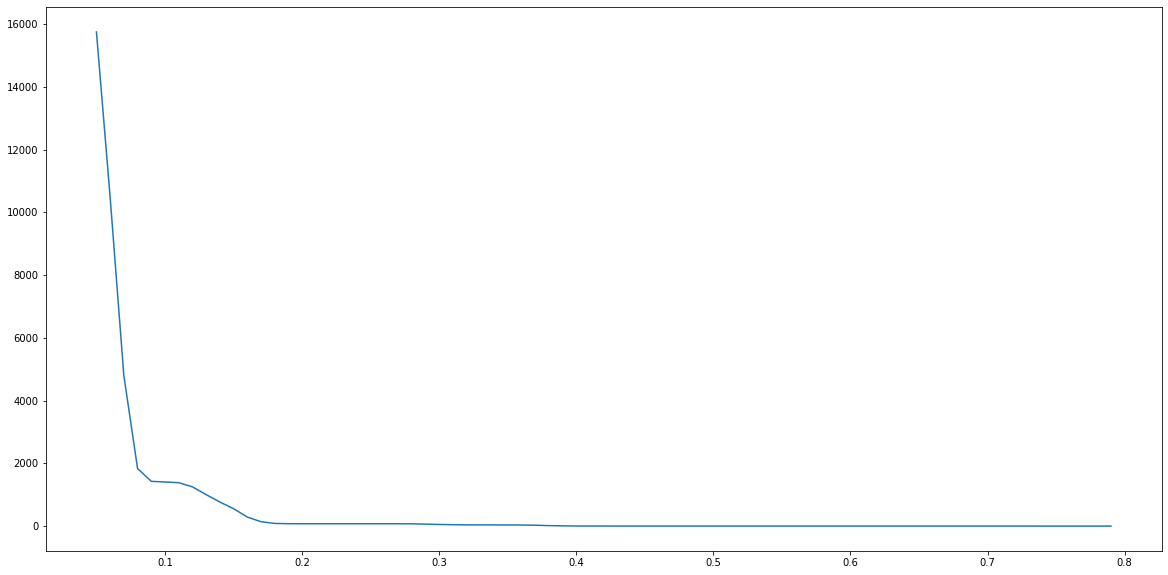

In [12]:
min_support_range = np.arange(0.05, 0.8, 0.01)

itemsets_lengths = []
for min_support in min_support_range:
    results = apriori(df, min_support=min_support, use_colnames=True)
    itemsets_lengths.append(len(results))

plt.figure()

plt.plot(min_support_range.tolist(), itemsets_lengths)

plt.show()

Как видно из графика количество наборов значительно уменьшается с повышением границы, что
логично.

Определим значения уровня поддержки при котором перестают генерироваться наборы
размера 1,2,3, и.т.д. Отметим полученные уровни поддержки на графике построенном
выше.

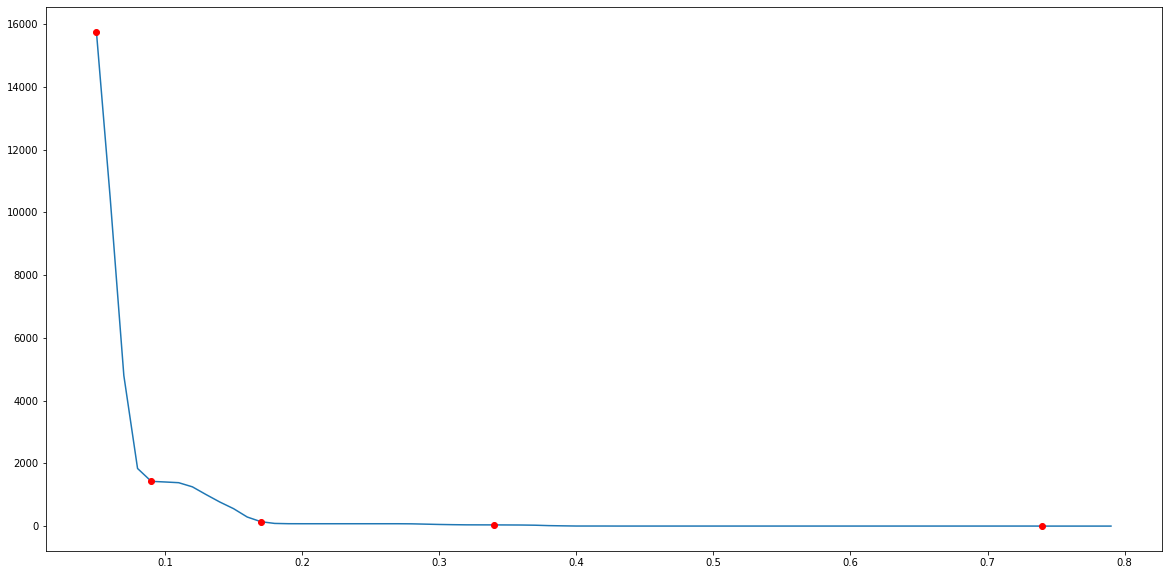

In [13]:
from math import isnan

itemsets_lengths = []
threshold_supports = []
threshold_lengths = []

last_itemset_len = len(df.columns)

for min_support in min_support_range:
    results = apriori(df, min_support=min_support, use_colnames=True)
    itemsets_lengths.append(len(results))

    results['length'] = results['itemsets'].apply(lambda x: len(x))
    current_itemset_max_len = results['length'].max()

    if isnan(current_itemset_max_len):
        current_itemset_max_len = 0

    if current_itemset_max_len < last_itemset_len:
        last_itemset_len = current_itemset_max_len
        threshold_supports.append(min_support)
        threshold_lengths.append(len(results))

plt.figure()

plt.plot(min_support_range.tolist(), itemsets_lengths)
plt.plot(threshold_supports, threshold_lengths, 'ro')

plt.show()

Построим датасет только из тех элементов, которые попадают в наборы размером 1 при
уровне поддержки 0.38

In [14]:
results = apriori(df, min_support=0.38, use_colnames=True, max_len=1)
new_items = [ list(elem)[0] for elem in results['itemsets']]
new_dataset = [[elem for elem in all_data[all_data[1] == id][2] if elem in
new_items] for id in unique_id]

Приведём полученный датасет к формату, который можно обработать

In [15]:
te = TransactionEncoder()
te_ary = te.fit(new_dataset).transform(new_dataset)
df = pd.DataFrame(te_ary, columns=te.columns_)

df

,aluminum foil,bagels,cereals,cheeses,dinner rolls,dishwashing liquid/detergent,eggs,ice cream,lunch meat,milk,poultry,soda,vegetables,waffles,yogurt
0,True,False,False,False,True,False,False,True,True,False,False,True,True,False,True
1,True,False,True,True,False,True,False,False,False,True,False,False,True,True,True
2,False,True,True,True,True,False,True,True,True,True,True,True,True,False,False
3,False,False,True,False,False,False,False,False,True,False,False,True,False,False,False
4,False,False,False,False,True,False,True,False,False,True,True,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1134,False,False,True,True,True,True,False,True,False,False,True,False,False,False,False
1135,False,False,True,True,True,True,True,False,True,True,True,False,True,False,False
1136,False,True,False,False,True,True,True,False,True,False,True,False,True,False,True
1137,False,False,False,True,False,False,False,False,False,True,True,True,True,True,True


Проведём ассоциативный анализ при уровне поддержки 0.3 для нового датасета.

In [16]:
results = apriori(df, min_support=0.3, use_colnames=True)
results

,support,itemsets
0,0.384548,(aluminum foil)
1,0.385426,(bagels)
2,0.395961,(cereals)
3,0.390694,(cheeses)
4,0.388938,(dinner rolls)
5,0.388060,(dishwashing liquid/detergent)
6,0.389816,(eggs)
7,0.398595,(ice cream)
8,0.395083,(lunch meat)
9,0.380158,(milk)


Как видно в подборке присутствуют лишь 28 элементов, вместо 52 ранее, потому
что из датасета были исключены элементы с частотой менее 0.38 и размером
набора 1. Те элементы, что были получены присутствуют также в старой подборке.

Проведём ассоциативный анализ при уровне поддержки 0.15 для нового датасета.

In [17]:
results = apriori(df, min_support=0.15, use_colnames=True)
results

,support,itemsets
0,0.384548,(aluminum foil)
1,0.385426,(bagels)
2,0.395961,(cereals)
3,0.390694,(cheeses)
4,0.388938,(dinner rolls)
...,...,...
127,0.158033,"(eggs, vegetables, soda)"
128,0.157155,"(eggs, yogurt, vegetables)"
129,0.158033,"(poultry, vegetables, lunch meat)"
130,0.157155,"(waffles, vegetables, lunch meat)"


Выведем все наборы размер которых больше 1 и в котором есть 'yogurt' или 'waffles'

In [18]:
results['length'] = results['itemsets'].apply(lambda x: len(x))
results = results[results['length'] > 1]
results = results[results['itemsets'].apply(lambda x: ('yogurt' in x) or ('waffles' in x))]
results

,support,itemsets,length
27,0.169447,"(aluminum foil, waffles)",2
28,0.177349,"(aluminum foil, yogurt)",2
40,0.159789,"(bagels, waffles)",2
41,0.162423,"(bagels, yogurt)",2
52,0.160667,"(waffles, cereals)",2
53,0.172081,"(yogurt, cereals)",2
63,0.172959,"(waffles, cheeses)",2
64,0.172081,"(yogurt, cheeses)",2
73,0.169447,"(dinner rolls, waffles)",2
74,0.166813,"(dinner rolls, yogurt)",2


Построим датасет, из тех элементов, которые не попали в датасет в п. 6 и приведём его к
удобному для анализа виду.

In [19]:
# All data dataframe
te = TransactionEncoder()
te_ary = te.fit(dataset).transform(dataset)
all_df = pd.DataFrame(te_ary, columns=te.columns_)

# print(all_df)
# print(new_items) # From #6

diff_df = all_df[all_df.columns.difference(new_items)]
diff_df

# print(new_items)
# print(diff_df.columns)

,all- purpose,beef,butter,coffee/tea,flour,fruits,hand soap,individual meals,juice,ketchup,...,pasta,pork,sandwich bags,sandwich loaves,shampoo,soap,spaghetti sauce,sugar,toilet paper,tortillas
0,True,True,True,False,True,False,False,False,False,False,...,False,True,True,False,True,True,False,False,False,False
1,False,False,False,False,False,False,True,True,False,False,...,False,False,True,False,True,False,False,False,True,True
2,False,False,False,False,False,False,True,False,False,True,...,False,True,False,True,True,True,True,False,True,False
3,True,False,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,True,False
4,True,False,False,False,True,False,True,True,False,False,...,True,True,False,True,False,False,True,False,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1134,True,True,False,True,False,True,True,False,True,False,...,False,True,True,False,True,True,False,True,False,False
1135,False,False,False,True,False,False,True,True,False,False,...,True,False,False,False,False,True,True,False,False,False
1136,False,True,False,False,False,False,True,True,True,False,...,False,True,False,False,True,True,False,True,False,True
1137,True,True,False,False,False,False,False,False,False,True,...,False,False,True,False,False,True,True,True,True,False


Проведём анализ apriori для полученного датасета для уровней поддержки 0.3 и 0.15

In [20]:
results = apriori(diff_df, min_support=0.3, use_colnames=True)
results

,support,itemsets
0,0.374890,(all- purpose)
1,0.374890,(beef)
2,0.367867,(butter)
3,0.379280,(coffee/tea)
4,0.352941,(flour)
5,0.370500,(fruits)
6,0.345917,(hand soap)
7,0.375768,(individual meals)
8,0.376646,(juice)
9,0.371378,(ketchup)


In [21]:
results = apriori(diff_df, min_support=0.15, use_colnames=True)
results

,support,itemsets
0,0.374890,(all- purpose)
1,0.374890,(beef)
2,0.367867,(butter)
3,0.379280,(coffee/tea)
4,0.352941,(flour)
...,...,...
128,0.154522,"(soap, sugar)"
129,0.164179,"(soap, toilet paper)"
130,0.151888,"(toilet paper, spaghetti sauce)"
131,0.151888,"(toilet paper, sugar)"


Напишем правило, для вывода всех наборов, в которых хотя бы два элемента начинаются
на 's'

In [22]:
# All data dataframe
te = TransactionEncoder()
te_ary = te.fit(dataset).transform(dataset)
all_df = pd.DataFrame(te_ary, columns=te.columns_)

results = apriori(all_df, min_support=0.1, use_colnames=True)
# print(results)
results = results[results['itemsets'].apply(
    lambda x: np.fromiter(
        map(lambda y: y.startswith('s'), x), dtype=bool
    ).sum() >= 2
)]
results

,support,itemsets
675,0.137840,"(sandwich loaves, sandwich bags)"
676,0.146620,"(shampoo, sandwich bags)"
677,0.158911,"(sandwich bags, soap)"
678,0.162423,"(sandwich bags, soda)"
679,0.147498,"(sandwich bags, spaghetti sauce)"
680,0.131694,"(sandwich bags, sugar)"
686,0.150132,"(sandwich loaves, shampoo)"
687,0.158033,"(sandwich loaves, soap)"
688,0.141352,"(sandwich loaves, soda)"
689,0.150132,"(sandwich loaves, spaghetti sauce)"


Напишем правило, для вывода всех наборов, для которых уровень поддержки изменяется
от 0.1 до 0.25

In [23]:
# All data dataframe
te = TransactionEncoder()
te_ary = te.fit(dataset).transform(dataset)
all_df = pd.DataFrame(te_ary, columns=te.columns_)

results = apriori(all_df, min_support=0.1, use_colnames=True)

results = results[np.logical_and(results.support <= 0.25, results.support >= 0.1)]
results

,support,itemsets
38,0.157155,"(all- purpose, aluminum foil)"
39,0.150132,"(bagels, all- purpose)"
40,0.144864,"(beef, all- purpose)"
41,0.147498,"(butter, all- purpose)"
42,0.151010,"(all- purpose, cereals)"
...,...,...
1401,0.135206,"(waffles, vegetables, toilet paper)"
1402,0.130817,"(yogurt, vegetables, toilet paper)"
1403,0.121159,"(waffles, vegetables, tortillas)"
1404,0.130817,"(yogurt, vegetables, tortillas)"
